In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('googleplaystore_filtered.csv', thousands = ',')

ind_features = ['Reviews', 'Size', 'Installs', 'Price']
X = df[ind_features]
y = df['Rating']
print(X.shape)
print(y.shape)

(9360, 4)
(9360,)


In [3]:
X_new = SelectKBest(f_regression, k=3).fit_transform(X, y)
X_new

array([[1.59000e+02, 1.90000e+01, 1.00000e+04],
       [9.67000e+02, 1.40000e+01, 5.00000e+05],
       [8.75100e+04, 8.70000e+00, 5.00000e+06],
       ...,
       [4.00000e+00, 3.60000e+00, 1.00000e+02],
       [1.14000e+02, 1.30000e+01, 1.00000e+03],
       [3.98307e+05, 1.90000e+01, 1.00000e+07]])

In [4]:
X

,Reviews,Size,Installs,Price
0,159,19.0,10000,0.0
1,967,14.0,500000,0.0
2,87510,8.7,5000000,0.0
3,215644,25.0,50000000,0.0
4,967,2.8,100000,0.0
...,...,...,...,...
9355,7,2.6,500,0.0
9356,38,53.0,5000,0.0
9357,4,3.6,100,0.0
9358,114,13.0,1000,0.0


In [5]:
pearsonr(df['Reviews'], df['Rating'])

PearsonRResult(statistic=0.06813270883720679, pvalue=4.155367872052734e-11)

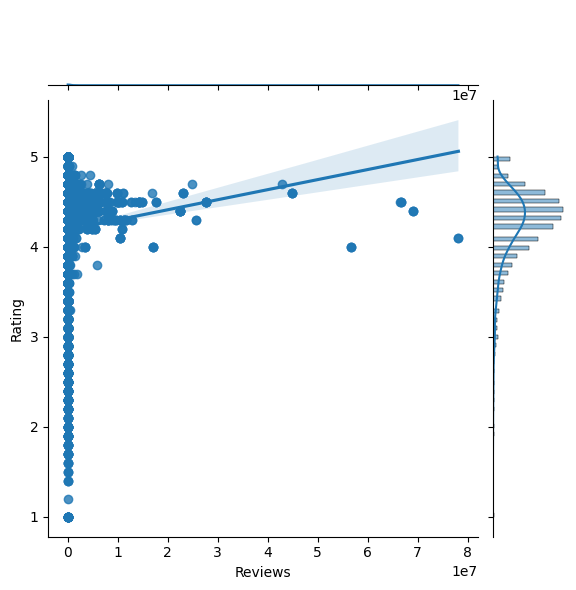

In [6]:
j = sns.jointplot(x=df['Reviews'], y=df['Rating'],kind='reg')

### 피어슨 상관계수
피어슨 상관계수(Pearson correlation coefficient)는 두 변수 간의 선형적인 상관관계의 강도와 방향을 측정하는 통계적인 지표입니다. 피어슨 상관계수는 -1부터 1까지의 값을 가지며, 다음과 같이 해석됩니다:

- 1에 가까울수록 양의 선형 상관관계가 강함을 나타냅니다. 즉, 한 변수의 증가에 따라 다른 변수도 증가하는 경향이 있습니다.
- -1에 가까울수록 음의 선형 상관관계가 강함을 나타냅니다. 즉, 한 변수의 증가에 따라 다른 변수는 감소하는 경향이 있습니다.
- 0에 가까울수록 두 변수 간에는 선형 상관관계가 없음을 나타냅니다. 즉, 두 변수 간에는 선형적인 관련성이 거의 없습니다.


### p-value

p-value는 통계적 가설검정에서 사용되는 지표로, 주어진 데이터로부터 얻은 통계량이 귀무가설을 지지하는 정도를 나타냅니다. p-value는 가설을 테스트할 때, 귀무가설(영가설)이 참이라고 가정하고 표본 데이터로부터 얻은 통계량이 얼마나 극단적인지를 측정합니다.

일반적으로, p-value가 작을수록 귀무가설을 기각하고 대립가설을 지지하는 강력한 증거가 됩니다. 일반적인 임계값은 보통 0.05(5%)로 사용되며, 이 임계값보다 작은 p-value를 가지면 귀무가설을 기각하고 대립가설을 받아들입니다.

p-value는 주어진 가설에 따라 다르게 해석될 수 있습니다. 예를 들어, 두 그룹 간의 평균 차이를 비교하는 t-검정의 경우, p-value는 두 그룹의 평균이 동일하다는 귀무가설을 기각할 수 있는 강력한 증거를 제공합니다.

p-value를 사용하여 통계적 가설검정 결과를 해석할 때는, 유의수준과 함께 고려하여 결론을 내리는 것이 중요합니다. 유의수준은 통계적 검정에서 허용할 수 있는 오류의 최대 수준을 나타내며, 보통 0.05(5%)나 0.01(1%)이 사용됩니다.

### 예시) 가설: 어떤 식이 인간의 학업 성취도에 영향을 미친다.

- 귀무가설(H0): 식이 학업 성취도에 영향을 미치지 않는다.
- 대립가설(H1): 식이 학업 성취도에 영향을 미친다.

이제 실제 데이터를 수집하여 통계 분석을 진행하고, 피어슨 상관계수와 p-value를 계산합니다. 계산 결과로 피어슨 상관계수는 0.75이고 p-value는 0.03이라고 가정해봅시다.

피어슨 상관계수가 0.75라는 것은 식과 학업 성취도 간에 양의 선형적인 상관관계가 있음을 나타냅니다. 즉, 식이 학업 성취도를 양적으로 증가시키는 경향이 있습니다.

p-value가 0.03인 경우, 유의수준을 0.05로 설정한다면 p-value가 유의수준보다 작으므로 귀무가설을 기각할 수 있습니다. 이는 식이 학업 성취도에 영향을 미친다는 대립가설을 지지하는 강력한 증거가 됩니다.

따라서, 이 예시에서는 식과 학업 성취도 사이의 양의 상관관계를 나타내는 피어슨 상관계수와 유의수준을 충족시키는 작은 p-value가 나왔으므로, 식이 학업 성취도에 영향을 미친다는 대립가설을 받아들일 수 있습니다.





In [7]:
out_list = []

for column in ind_features:
    corr_list = pearsonr(df[column], df['Rating'])
    out_list.append([column, corr_list[0], corr_list[1]])
    
print(out_list)

corr_df = pd.DataFrame(out_list, columns=['Features', 'co-relation', 'P-value'])
corr_df.sort_values(by=['P-value'])

[['Reviews', 0.06813270883720679, 4.155367872052734e-11], ['Size', 0.06585466900267059, 1.8021360379615822e-10], ['Installs', 0.05133692709156859, 6.719094655481812e-07], ['Price', -0.021919498334990593, 0.033953854445535225]]


,Features,co-relation,P-value
0,Reviews,0.068133,4.155368e-11
1,Size,0.065855,1.802136e-10
2,Installs,0.051337,6.719095e-07
3,Price,-0.021919,3.395385e-02


In [8]:
'''
p-value를 통해 결과에 영향을 미치지 않는 요소 price를 찾았다.
'''
df.drop('Price', axis=1, inplace=True)
df.corr()

C:\Users\csjty\AppData\Local\Temp\ipykernel_10156\2926436359.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Reviews,Size,Installs,year_added,month_added
Rating,1.000000,0.068133,0.065855,0.051337,0.137871,0.017234
Reviews,0.068133,1.000000,0.100870,0.641605,0.078321,0.048959
Size,0.065855,0.100870,1.000000,0.040449,0.180163,0.031644
Installs,0.051337,0.641605,0.040449,1.000000,0.092689,0.060282
year_added,0.137871,0.078321,0.180163,0.092689,1.000000,-0.171858
month_added,0.017234,0.048959,0.031644,0.060282,-0.171858,1.000000


C:\Users\csjty\AppData\Local\Temp\ipykernel_10156\187259630.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'])


<AxesSubplot: xlabel='Size', ylabel='Density'>

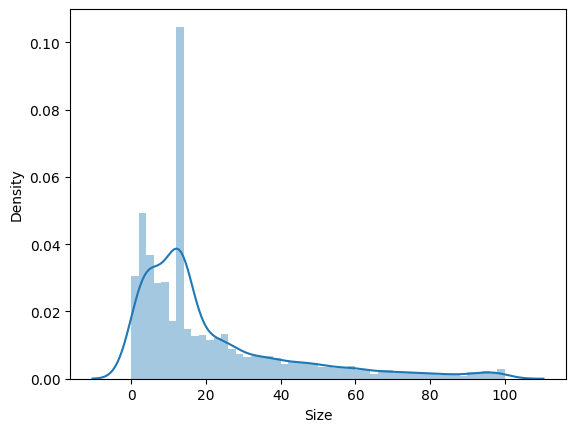

In [9]:
sns.distplot(df['Size'])

In [10]:
'''
Type(free/paid)를 기준으로 그룹화
'''
feature = 'Size'
df2 = pd.DataFrame()
for key, subdf in df.groupby('Type'):
    m=np.mean(subdf[feature])
    std=np.std(subdf[feature])
    reduced_df=subdf[(subdf[feature]>(m-std)) & (subdf[feature] <= (m+std))]
    df2 = pd.concat([df2, reduced_df])
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


(9360, 14)
(7958, 14)


C:\Users\csjty\AppData\Local\Temp\ipykernel_10156\458585884.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Size'])


<AxesSubplot: xlabel='Size', ylabel='Density'>

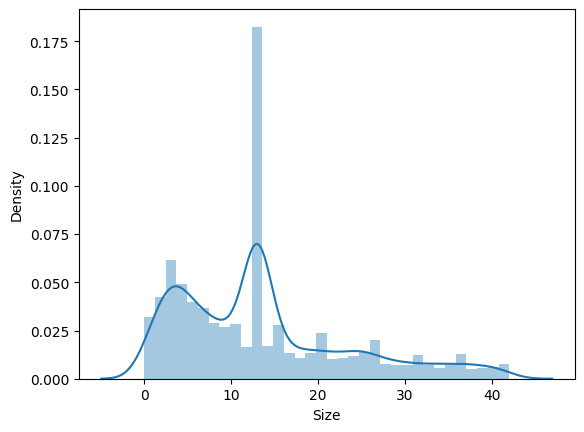

In [11]:
print(df.shape)
print(df2.shape)
sns.distplot(df2['Size'])

C:\Users\csjty\AppData\Local\Temp\ipykernel_10156\521558251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Installs'])


<AxesSubplot: xlabel='Installs', ylabel='Density'>

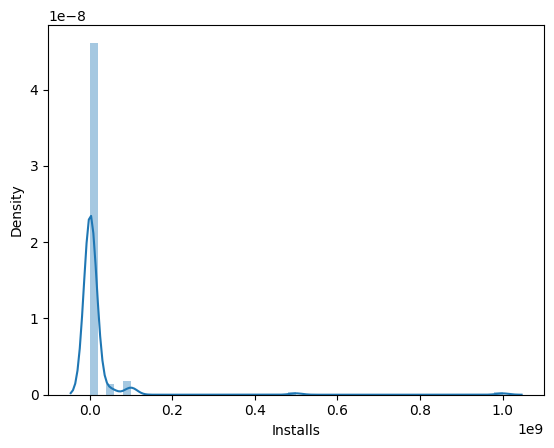

In [12]:
sns.distplot(df2['Installs'])

<AxesSubplot: >

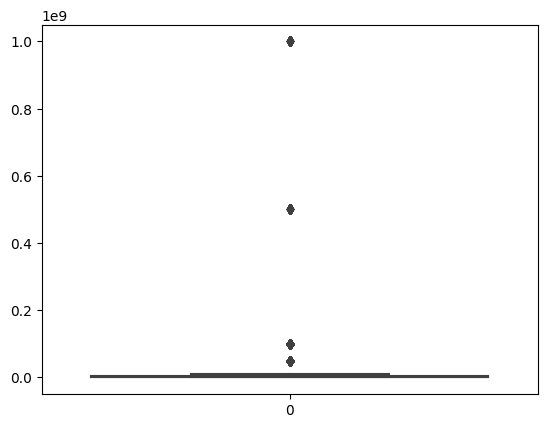

In [13]:
'''
sns.boxplot: 데이터의 분포와 이상치를 시각적으로 파악할 수 있다.

중앙값(Median): 상자의 가로선이 위치한 곳이 중앙값을 나타냅니다. 중앙값은 데이터의 중심 위치를 알려줍니다.

사분위수(Quartiles): 상자의 위쪽 가로선은 데이터의 75% 백분위수(3사분위수)를, 아래쪽 가로선은 데이터의 25% 백분위수(1사분위수)를 나타냅니다. 이를 통해 데이터의 중간 50% 범위를 확인할 수 있습니다.

이상치(Outliers): 상자 그림에서 점 또는 원으로 표시되는 값들은 이상치를 나타냅니다. 이상치는 주어진 데이터 집합에서 일반적인 범위를 벗어난 값으로 간주됩니다. 이상치를 시각화하여 데이터의 분포에서 벗어난 값들을 확인할 수 있습니다.
'''
sns.boxplot(df2['Installs'])

4990000.0
-7475000.0
12485000.0
615


C:\Users\csjty\AppData\Local\Temp\ipykernel_10156\4233270660.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Installs'])


<AxesSubplot: xlabel='Installs', ylabel='Density'>

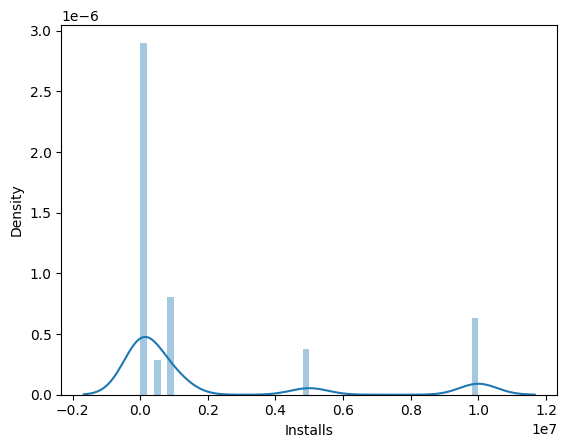

In [14]:
'''
'Installs' 열을 기준으로 IQR (Interquartile Range)를 계산하고
이를 사용하여 이상치(outlier)의 경계값을 계산
'''

q1 = df2['Installs'].quantile(0.25) # 하위 25%
q3 = df2['Installs'].quantile(0.75) # 상위 25%

iqr = q3 - q1 # 중간 50% 범위
print(iqr)

lower_tail = q1 - 1.5 * iqr # 이상치 경계값의 하한
upper_tail = q3 + 1.5 * iqr # 이상치 경계값의 상한
print(lower_tail)
print(upper_tail)

outliers = []

for install in df2['Installs']:
    if install > upper_tail or install < lower_tail:
        outliers.append(install)
    else:
        continue
print(len(outliers))

for install in df2['Installs']:
    if install > upper_tail or install < lower_tail:
        df2['Installs'] = df2['Installs'].replace(install, np.median(df2['Installs']))
    else:
        continue
sns.distplot(df2['Installs'])

<AxesSubplot: >

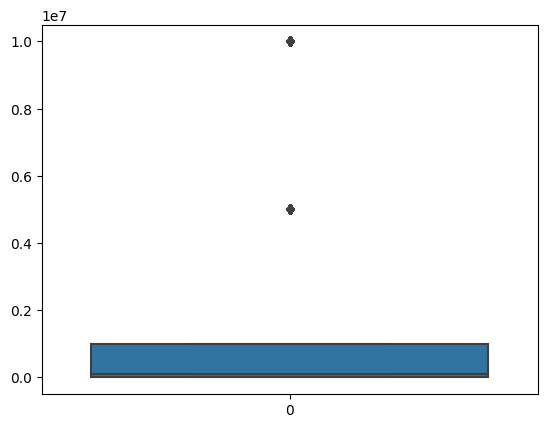

In [15]:
sns.boxplot(df2['Installs'])

In [16]:
print(df2['Reviews'].max())
print(df2['Reviews'].median())
print(df2['Reviews'].quantile(0.75))
print(df2['Reviews'].mean())

threshold = 1e7
print(df2[df2['Reviews']>threshold].shape)

78158306
3766.5
61627.75
410091.16310630814
(58, 14)


C:\Users\csjty\AppData\Local\Temp\ipykernel_10156\3766595960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Reviews'])


<AxesSubplot: xlabel='Reviews', ylabel='Density'>

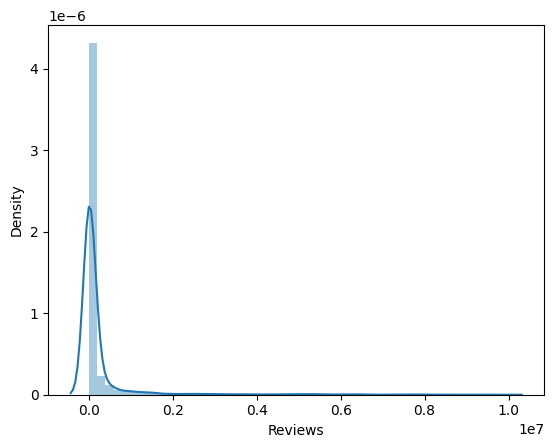

In [17]:
df2['Reviews'] = np.where(df2['Reviews']>threshold, df2['Reviews'].median(), df2['Reviews'])
sns.distplot(df2['Reviews'])

<AxesSubplot: >

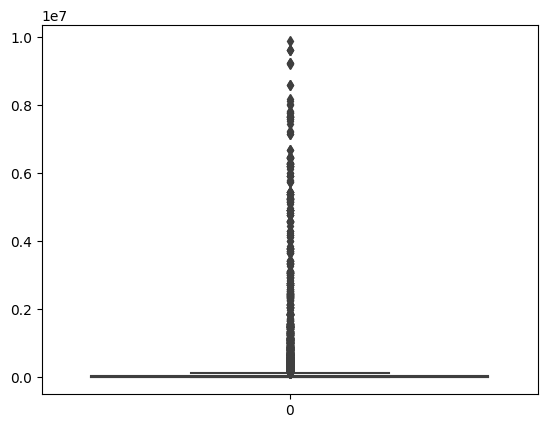

In [18]:
sns.boxplot(df2['Reviews'])

In [19]:
'''
로그 변환(log transformation)을 수행

로그 변환은 데이터의 큰 차이를 상대적으로 줄이거나, 비대칭 분포를 정규분포에 가깝게 만들 수 있다.
np.log1p(x)는 log(1 + x)와 같다.
'''
print(df2['Reviews'].median())
print(df2['Reviews'].mean())

df2['Reviews']=np.log1p(df2['Reviews'])

3761.75
228171.16285498868


C:\Users\csjty\AppData\Local\Temp\ipykernel_10156\95721252.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Reviews'])


<AxesSubplot: xlabel='Reviews', ylabel='Density'>

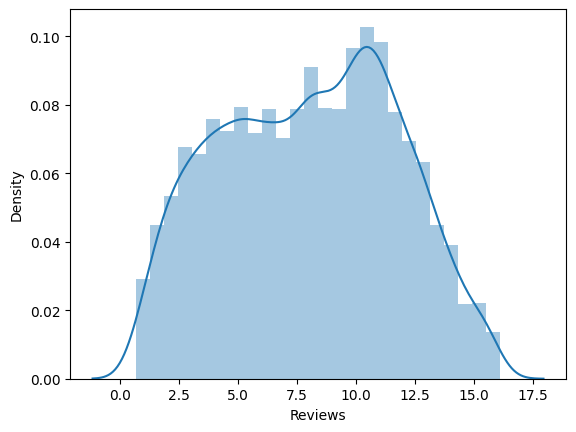

In [20]:
sns.distplot(df2['Reviews'])

In [21]:
df2['Rating'].isnull().sum()

0

<AxesSubplot: xlabel='Content Rating', ylabel='Rating'>

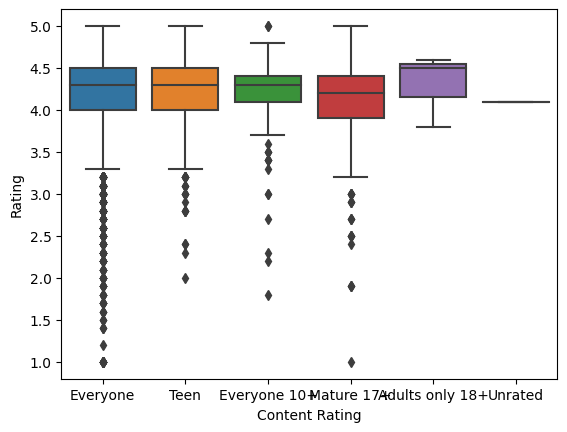

In [22]:
sns.boxplot(x=df2['Content Rating'], y=df2['Rating'])

In [23]:
print(df2.groupby('Content Rating')['Rating'].median(), '\n')
print(df2.groupby('Content Rating')['Rating'].mean())

Content Rating
Adults only 18+    4.5
Everyone           4.3
Everyone 10+       4.3
Mature 17+         4.2
Teen               4.3
Unrated            4.1
Name: Rating, dtype: float64 

Content Rating
Adults only 18+    4.300000
Everyone           4.178921
Everyone 10+       4.209701
Mature 17+         4.104749
Teen               4.213219
Unrated            4.100000
Name: Rating, dtype: float64


In [24]:
def impute_Rating(cols):
    
    Rating=cols[0]
    Content_rating=cols[1]
    
    if pd.isnull(Rating):
        if Content_rating=='Adults only 18+':
            return 4.3
        elif Content_rating=='Everyone':
            return 4.17
        elif Content_rating=='Everyone 10+':
            return 4.2
        elif Content_rating=='Mature 17+':
            return 4.1
        elif Content_rating=='Teen':
            return 4.21
        elif Content_rating=='Unrated':
            return 4.1
    else:
        return Rating
        

In [25]:
df2['Rating']=df2[['Rating', 'Content Rating']].apply(impute_Rating, axis=1)

<AxesSubplot: >

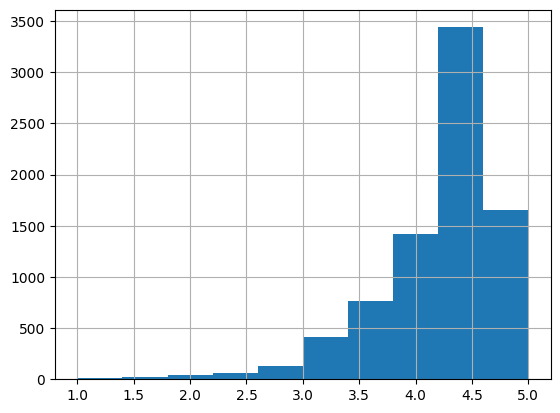

In [26]:
df2['Rating'].isnull().sum()
df2['Rating'].hist()

In [27]:
def convert(x):
    if x>0.0 and x<=1.5:
        return 1
    elif x>1.5 and x<=2.5:
        return 2
    elif x>2.5 and x<=3.5:
        return 3
    elif x>3.5 and x<=4.5:
        return 4
    else:
        return 5

In [29]:
df2['Rating'] = df2['Rating'].apply(convert)

In [32]:
df2['Rating']

0       4
1       4
2       5
3       4
4       4
       ..
9258    5
9260    5
9305    4
9319    4
9322    4
Name: Rating, Length: 7958, dtype: int64

<AxesSubplot: xlabel='Rating', ylabel='count'>

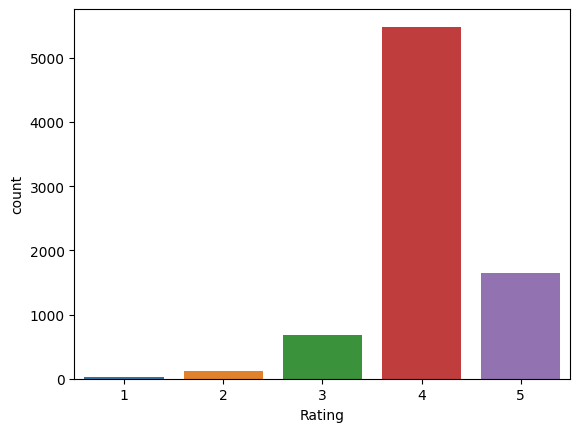

In [33]:
sns.countplot(x='Rating', data=df2)

In [36]:
df3 = df2.copy()

In [39]:
df3.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [43]:
mean_ordinal = df3.groupby('Category')['Rating'].mean().to_dict()
df3['Category'] = df3['Category'].map(mean_ordinal)

In [53]:
print(df3['Content Rating'].unique(), '\n')
ordinal_labels = df3.groupby('Content Rating')['Rating'].mean().sort_values().index
print(ordinal_labels)
dict_store = {key:value for value, key in enumerate(ordinal_labels)}
print(dict_store)
df3['Content Rating'] = df3['Content Rating'].map(dict_store)

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated'] 

Index(['Unrated', 'Mature 17+', 'Everyone 10+', 'Everyone', 'Teen',
       'Adults only 18+'],
      dtype='object', name='Content Rating')
{'Unrated': 0, 'Mature 17+': 1, 'Everyone 10+': 2, 'Everyone': 3, 'Teen': 4, 'Adults only 18+': 5}


In [54]:
'''
범주형 변수를 숫자형으로 인코딩
'''
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df3['Type'] = le.fit_transform(df3['Type'])
df3.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.344262,4,5.075174,19.0,10000,0,3,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,4.344262,4,6.875232,14.0,500000,0,3,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.344262,5,11.379520,8.7,5000000,0,3,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,4.344262,4,12.281389,25.0,100000,0,4,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,4.344262,4,6.875232,2.8,100000,0,3,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [55]:
df3.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

In [59]:
df3.drop(labels=['App', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1, inplace=True)

In [64]:
df3.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,4.344262,4,5.075174,19.0,10000,0,3,2018,1
1,4.344262,4,6.875232,14.0,500000,0,3,2018,1
2,4.344262,5,11.379520,8.7,5000000,0,3,2018,8
3,4.344262,4,12.281389,25.0,100000,0,4,2018,6
4,4.344262,4,6.875232,2.8,100000,0,3,2018,6


In [63]:
df3.to_csv('E:/workspace/ml-2023/applied-machine-learning-real-world-projects-using-python/predict-ratings-of-applications-on-play-store/googleplaystore_filtered_last.csv', index = False)

In [62]:
x = df3.drop('Rating', axis=1)
y = df3['Rating']
display(x)
display(y)

,Category,Reviews,Size,Installs,Type,Content Rating,year_added,month_added
0,4.344262,5.075174,19.00,10000,0,3,2018,1
1,4.344262,6.875232,14.00,500000,0,3,2018,1
2,4.344262,11.379520,8.70,5000000,0,3,2018,8
3,4.344262,12.281389,25.00,100000,0,4,2018,6
4,4.344262,6.875232,2.80,100000,0,3,2018,6
...,...,...,...,...,...,...,...,...
9258,4.213333,1.791759,0.84,100,1,3,2018,4
9260,4.148026,1.098612,16.00,1,1,3,2017,3
9305,4.204819,3.583519,2.40,1000,1,3,2018,8
9319,4.148026,5.533389,11.00,10000,1,4,2015,2


0       4
1       4
2       5
3       4
4       4
       ..
9258    5
9260    5
9305    4
9319    4
9322    4
Name: Rating, Length: 7958, dtype: int64